#### **Análise dos preços de aluguéis no Rio de Janeiro com Pandas**

Este notebook realiza uma análise exploratória dos preços médios de aluguéis em diferentes tipos de imóveis na cidade do **Rio de Janeiro**, utilizando a biblioteca **Pandas** para manipulação de dados e **Matplotlib** para visualização gráfica. A análise busca compreender a distribuição dos preços, identificar fatores que influenciam os valores e destacar tendências no mercado imobiliário local.

##### **Objetivos**

- Carregar e organizar os dados de aluguéis de imóveis no Rio de Janeiro;
- Tratar dados ausentes e inconsistências para garantir uma análise confiável;
- Criar visualizações que permitam identificar padrões de preços em diferentes regiões e tipos de imóveis;
- Avaliar as principais variáveis que impactam o preço do aluguel, como metragem, número de quartos e localização.

##### **Conjunto de dados**

Os dados utilizados contêm informações sobre o preço dos aluguéis de imóveis residenciais e comerciais no Rio de Janeiro, incluindo variáveis como bairro, metragem, número de quartos. Essas informações foram coletadas de fontes do mercado imobiliário e refletem tendências atuais.

##### **Bibliotecas utilizadas**

**Pandas** – Manipulação e análise de dados estruturados.  
**Matplotlib** – Geração de gráficos para análise visual dos dados.  
**Python** – Lógica e execução da análise.  

##### **Principais resultados**

Os preços dos aluguéis variam significativamente de acordo com a localização, com bairros mais valorizados apresentando preços médios mais altos. Imóveis maiores e com mais cômodos tendem a ter aluguéis mais elevados, mas há exceções em bairros específicos. A análise gráfica revelou padrões sazonais e variações significativas entre diferentes regiões do Rio de Janeiro, destacando as desigualdades no mercado imobiliário da cidade.

In [434]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [435]:
# importando os dados
dados = pd.read_csv('aluguel.csv', sep = ';')

In [436]:
# exibindo os dados (5 primeiras linhas)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [437]:
# verificando a quantidade de registros (linhas) e variáveis (colunas)
dados.shape

(32960, 9)

In [438]:
print(f'Quantidade de linhas: {dados.shape[0]}')
print(f'Quantidade de colunas: {dados.shape[1]}')

Quantidade de linhas: 32960
Quantidade de colunas: 9


In [439]:
# verificando os tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [440]:
# calculando a média geral dos aluguéis
dados['Valor'].mean()

12952.659715265761

In [441]:
print(f'Valor médio dos aluguéis: R$ {dados['Valor'].mean().round(2)}')

Valor médio dos aluguéis: R$ 12952.66


In [442]:
# calculando o valor médio do aluguel por tipo de imóvel
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


In [443]:
# atribuindo o df a uma variável
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

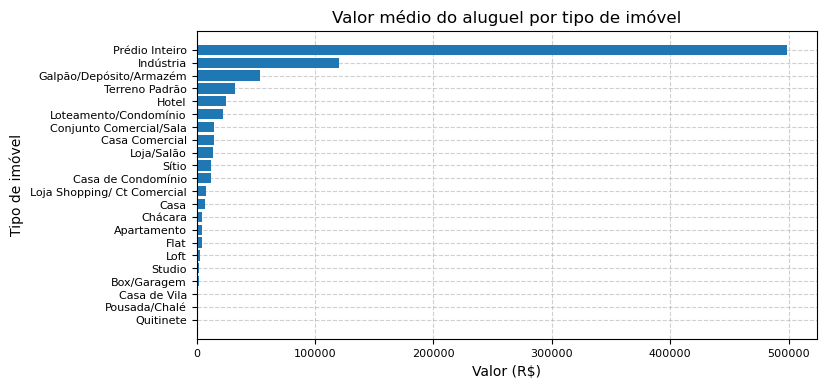

In [444]:
# visualizando o valor médio do aluguel por tipo de imóvel
plt.figure(figsize = (8, 4))
plt.barh(df_preco_tipo.index, df_preco_tipo['Valor'])
plt.title('Valor médio do aluguel por tipo de imóvel', fontsize = 12)
plt.xlabel('Valor (R$)', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Tipo de imóvel', fontsize = 10)
plt.yticks(fontsize = 8)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.gca().set_axisbelow(True)
plt.show()

In [445]:
# listando os diferentes tipos de imóveis disponíveis
dados['Tipo'].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [446]:
# atribuindo uma variável para os imóveis comerciais
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [447]:
# selecionando apenas os imóveis comerciais
dados.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [448]:
# selecionando apenas os imóveis residenciais
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [449]:
# criando novo df para imóveis residenciais
dados_residenciais = dados.query('@imoveis_comerciais not in Tipo')
dados_residenciais.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [450]:
# listando os diferentes tipos de imóveis residenciais disponíveis
dados_residenciais['Tipo'].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [451]:
# calculando o valor médio do aluguel por tipo de imóvel residencial
dados_residenciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Casa de Vila,1574.369478
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Casa,6793.454922
Casa de Condomínio,11952.061245


In [452]:
# atribuindo o df a uma variável
df_preco_tipo_residencial = dados_residenciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

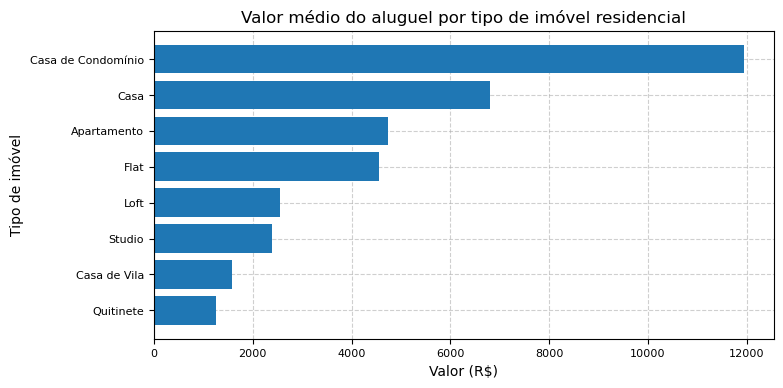

In [453]:
# visualizando o valor médio do aluguel por tipo de imóvel residencial
plt.figure(figsize = (8, 4))
plt.barh(df_preco_tipo_residencial.index, df_preco_tipo_residencial['Valor'])
plt.title('Valor médio do aluguel por tipo de imóvel residencial', fontsize = 12)
plt.xlabel('Valor (R$)', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Tipo de imóvel', fontsize = 10)
plt.yticks(fontsize = 8)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.gca().set_axisbelow(True)
plt.show()

In [454]:
# criando um df com o percentual de cada tipo de imóvel residencial
df_percentual_tipo = dados_residenciais['Tipo'].value_counts(normalize = True).to_frame().sort_values('proportion', ascending = False)
df_percentual_tipo.rename(columns = {'proportion': 'Percentual (%)'}, inplace = True)
df_percentual_tipo

,Percentual (%)
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


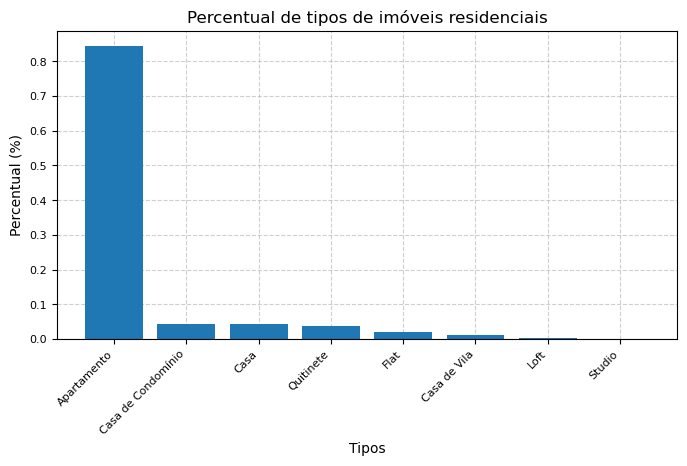

In [455]:
# visualizando o percentual dos tipos de imóveis residencias
plt.figure(figsize = (8, 4))
plt.bar(df_percentual_tipo.index, df_percentual_tipo['Percentual (%)'])
plt.title('Percentual de tipos de imóveis residenciais', fontsize = 12)
plt.xlabel('Tipos', fontsize = 10)
plt.xticks(rotation = 45, ha = 'right', fontsize = 8)
plt.ylabel('Percentual (%)', fontsize = 10)
plt.yticks(fontsize = 8)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.gca().set_axisbelow(True)
plt.show()

In [456]:
# criando novo df para apartamentos
dados_apartamentos = dados_residenciais.query('Tipo == "Apartamento"')
dados_apartamentos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [457]:
# verificando a quantidade de dados nulos em cada coluna
dados_apartamentos.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [458]:
# substituindo valores nulos por zero
dados_apartamentos = dados_apartamentos.fillna(0)

In [459]:
dados_apartamentos.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [460]:
# verificando os valores zerados
dados_apartamentos.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [461]:
# identificando os imóveis que possuem valores zerados para aluguel ou condomínio
dados_apartamentos.query('Valor == 0 | Condominio == 0').index

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [462]:
# criando uma variável para os índices que serão removidos
registros_a_remover = dados_apartamentos.query('Valor == 0 | Condominio == 0').index

In [463]:
# removendo as linhas com valores zerados
dados_apartamentos.drop(registros_a_remover, axis = 0, inplace = True)

In [464]:
dados_apartamentos.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [465]:
# verificando os tipos de imóveis disponíveis no dataset filtrado
dados_apartamentos['Tipo'].unique()

array(['Apartamento'], dtype=object)

In [466]:
# removendo a coluna 'Tipo'
dados_apartamentos.drop('Tipo', axis = 1, inplace = True)
dados_apartamentos

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [467]:
# filtrando imóveis (apartamentos com 1 quarto e aluguel menor que R$ 1200)
selecao = (dados_apartamentos['Quartos'] == 1) & (dados_apartamentos['Valor'] < 1200)
dados_apartamentos[selecao]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Tijuca,1,0,0,48,750.0,772.0,25.0
29,Centro,1,0,0,27,750.0,371.0,19.0
52,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
18562,Grajaú,1,0,1,37,1000.0,200.0,0.0
18576,Pechincha,1,0,1,69,900.0,640.0,126.0
18581,Glória,1,0,0,46,1100.0,453.0,32.0
18636,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [468]:
# criando um novo df com os apartamentos selecionados
df1 = dados_apartamentos[selecao]

In [469]:
# filtrando imóveis (apartamentos com pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior de 70 m²)
selecao = (dados_apartamentos['Quartos'] >= 2) & (dados_apartamentos['Valor'] < 3000) & (dados_apartamentos['Area'] > 70)
dados_apartamentos[selecao].head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,Tijuca,2,1,0,110,1900.0,700.0,138.0
11,Tijuca,2,1,0,78,2000.0,700.0,0.0
15,Botafogo,2,1,0,76,2500.0,740.0,0.0
18,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0


In [470]:
# criando um novo df com os apartamentos selecionados
df2 = dados_apartamentos[selecao]

In [471]:
# salvando o df no padrão inicial
dados_apartamentos.to_csv('dados_apartamentos.csv', index = False, sep = ';')

In [472]:
pd.read_csv('dados_apartamentos.csv', sep = ';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [473]:
# incluindo nova coluna numérica no df original (valor mensal)
dados = pd.read_csv('aluguel.csv', sep = ';')
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']

In [474]:
# incluindo nova coluna numérica no df original (valor anual)
dados['Valor_por_ano'] = (dados['Valor_por_mes'] * 12) + dados['IPTU']

In [475]:
# incluindo nova coluna categórica no df original (descrição do imóvel)
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + \
                     dados['Quartos'].astype(str) + ' quarto(s) ' + ' e ' + \
                     dados['Vagas'].astype(str) + ' vaga(s) de garagem.'

In [476]:
# incluindo nova coluna categórica no df original (coluna binária para suíte no imóvel)
dados['Possui_suite'] = dados['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')

In [477]:
# exibindo o df com as novas colunas (5 primeiras linhas)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não


In [478]:
# salvando o novo df no padrão inicial
dados.to_csv('dados_completos.csv', index = False, sep = ';')

In [479]:
pd.read_csv('dados_completos.csv', sep = ';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete em Centro com 0 quarto(s) e 0 vaga(...,Não
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento em Jacarepaguá com 3 quarto(s) e ...,Sim
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento em São Francisco Xavier com 2 quar...,Não
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,3760.0,NaN,Apartamento em Leblon com 2 quarto(s) e 0 vag...,Não
